<h1><center> PPOLS564: Foundations of Data Science </center><h1>
<h3><center> Lecture 12 <br><br><font color='grey'> Matrices as Transformations </font></center></h3>

# Concepts For today:

- Linear Transformations
- Transformations represented as Matrices 
- Applied Example with linear regression coefficients
- Dot Products of 2 or more matrices 
- Delve into some of `numpy`'s functionality
    + indexing
    + useful methods
    + constructing and manipulating numerical matrices

## Note
In the following lectures, we'll delve into exploring linear algebra. Note that I'll be using some code to help generate some interactive visualizes for some concepts. To use this code yourself, two things must be true: (1) the `bokeh` module must be installed, and (2) the `visualize.py` script must be in the same file director as this notebook and the jupyter notebook must be activated from that location.

Finally, note that these lecture slides are intended to be supplementary to the lectures and readings.

In [41]:
import numpy as np
from visualize import LinearAlgebra as vla
plot = vla()

# Linear Transformations

Recall that mathematical functions map a set of numbers onto an another set of numbers.

$$ y = f(x)$$ 

or

$$ f: x  \mapsto  y$$

Here the function $f(\cdot)$ is mapping values of $x$ (domain) onto values of $y$ (codomain). 

> Note: the "range" of a function is the subset of the codomain that the values of the domain map onto. Put differently, not every value in set $x$ will map onto a location in set $y$, the range specifies the space in which this mapping occurs.

When the domain and codomain are members of $\Re^1$, we call it a **scalar value function**.

$$f: \Re^1 \mapsto  \Re^1$$

When the domain and codomain are members of $\Re^n$, we call it a **vector value function**.

$$f: \Re^n \mapsto  \Re^m$$

The mapping of one vector in $\Re^n$ space to another $\Re^n$ space is known as a **transformation**. That is, we are transforming some space into another space. 

#### Question: How do we transform $\vec{a}$ so that it becomes $\vec{b}$?

In [2]:
a = np.array([1,2])
b = np.array([-1,6])

In [3]:
plot.graph(10)
plot.vector(a,add_color="purple",alpha=.3)
plot.vector(b,add_color="black",alpha=.3)
plot.show()

Let's define a function that will do this for us. 

In [4]:
def f(vec=None):
    x = vec[0] - vec[1]
    y = vec[1]*3
    return np.array([x,y])

f(a)

array([-1,  6])

In [5]:
plot.vector(f(a),add_color="purple",alpha=.5)
plot.show()

Using `f()`, we outlined a set of instructions regarding how to reposition $\vec{a}$ so that it becomes $\vec{b}$.


Put formally, we've mapped the values of $\vec{a}$ onto $\vec{b}$

$$f: \vec{a} \mapsto \vec{b} ~~~|~\vec{a}~,~\vec{b}~\in~\Re^2$$

## Transformations as Matrices

We can represent these instructions numerically by transforming the unit vectors in $\Re^2$ using our instruction.

Recall that,

$$ \hat{\imath} = \begin{bmatrix}   1\\0   \end{bmatrix}$$
$$ \hat{\jmath} = \begin{bmatrix}   0\\1   \end{bmatrix}$$

When stacking the unit vectors as column vectors in a matrix, we get a special type of matrix that we call the **identity matrix**. 

$$ \textbf{I} = \begin{bmatrix}  \hat{\imath} & \hat{\jmath}  \end{bmatrix} = \begin{bmatrix}  1 & 0\\ 0 & 1   \end{bmatrix}$$

In [6]:
# Generating an identity matrix using the .eye() method in numpy
I = np.eye(2) 
I

array([[1., 0.],
       [0., 1.]])

Here is our transformation recipe again:

$$ f(x) = \begin{bmatrix}   x_1 - x_2  \\  3x_2   \end{bmatrix} $$

Let's apply the transformation to our unit vectors:

$$ f(\hat{\imath}) = f(\begin{bmatrix}   1\\0   \end{bmatrix}) = \begin{bmatrix}   1 - 0  \\ 3(0)   \end{bmatrix} = \begin{bmatrix}   1 \\ 0   \end{bmatrix}$$

$$ f(\hat{\jmath}) = f(\begin{bmatrix}   0\\1   \end{bmatrix}) = \begin{bmatrix}   0 - 1  \\ 3(1)   \end{bmatrix} = \begin{bmatrix}   -1 \\ 3 \end{bmatrix}$$

This yields a matrix (which we'll call $\textbf{A}$) which contains numerical instructions how to perform our transformation. 

$$ \textbf{A} = \begin{bmatrix}   1 & -1  \\ 0 & 3  \end{bmatrix} $$

In [92]:
A = f(I)
A

array([[ 1., -1.],
       [ 0.,  3.]])

When we multiply this matrix $\textbf{A}$ on our original vector  $\vec{a}$, we get the transformed version f($\vec{a}$), which maps onto the location of $\vec{b}$.

In [96]:
A.dot(a)

array([-1.,  6.])

#### To figure out what is going on here, pay attention to the unit vectors

In [9]:
plot = vla()
plot.graph(5,500,grid=True)
plot.unit_vectors()
plot.vector(a)
plot.show()

In [10]:
plot = vla(basis=A)
plot.graph(10,500,grid=True)
plot.unit_vectors()
plot.vector(a)
plot.show()

We can think of a transformation as changing the **basis** of the coordinate system. We now can view the $\vec{a}$ from the perspective of $\textbf{A}$. The transformation we performed can be extended to any vector in $\Re^2$ using matrix $\textbf{A}$. The point is matrix multiplication is always a transformation of one vector from one representation into another.  

Put differently, recall that we can express any vector as a **linear combination** of our unit vectors. 


$$ \vec{a} = c_1 \hat{\imath} + c_2 \hat{\jmath}~~|~~c_1, c_2 \in \Re^2$$


To transform $\vec{a}$ into $\vec{b}$, we are just changing those unit vectors so that they represent a different type of coordinate system.

$$ \vec{b} = f(\vec{a}) = \textbf{A} \vec{a} =  \textbf{A} (c_1 \hat{\imath} + c_2 \hat{\jmath}) =  c_1 \textbf{A} \hat{\imath} + c_2 \textbf{A} \hat{\jmath} $$


We can now use this transformation on any 2D vector. 

In [11]:
c = np.array([1,.1])
d = np.array([-1,-1])
g = np.array([-.79,2.4])

plot = vla()
plot.graph(7,500,grid=True)
plot.vector(a,alpha=.5)
plot.vector(c,alpha=.5)
plot.vector(d,alpha=.5)
plot.vector(g,alpha=.5)
plot.show()

In [12]:
plot = vla(basis=A)
plot.graph(11,500,grid=True)
plot.vector(a,alpha=.5)
plot.vector(c,alpha=.5)
plot.vector(d,alpha=.5)
plot.vector(g,alpha=.5)
plot.show()

Formally, the resulting vectors are equivalent to taking the dot product of our transformation matrix $\textbf{A}$ and the vectors.

In [13]:
print(A.dot(a))
print(A.dot(c))
print(A.dot(d))
print(A.dot(g))

[-1.  6.]
[0.9 0.3]
[ 0. -3.]
[-3.19  7.2 ]


In [14]:
plot = vla()
plot.graph(11,500,grid=True)
plot.vector(A.dot(a),alpha=.5)
plot.vector(A.dot(c),alpha=.5)
plot.vector(A.dot(d),alpha=.5)
plot.vector(A.dot(g),alpha=.5)
plot.show()

Let's play with this a little more

In [15]:
# 90 degree rotation
B = np.array([[-1,0],
              [0,1]])
plot = vla(basis=B)
plot.graph(5,500,grid=True)
plot.unit_vectors()
plot.vector(a)
plot.show()

In [91]:
# Or something more involved
B = np.array([[-3,1],
              [.5,2.3]])
plot = vla(basis=B)
plot.graph(10,500,grid=True)
plot.unit_vectors()
plot.vector(a)
plot.show()

### Calculating the dot product of a matrix and vector by hand

$$\textbf{A}_{nxn} = \begin{bmatrix} a_{11} & a_{12} & \dots & a_{1n}  \\ 
                                     a_{21}  & a_{22} & \dots & a_{2n} \\
                                     \vdots & \vdots & \ddots & \vdots \\
                                     a_{n1}  & a_{n2} & \dots & a_{nn} \\
                     \end{bmatrix} $$

$$ \vec{x} = \begin{bmatrix} x_{1} \\x_{2} \\ \vdots \\ x_{n}   \end{bmatrix} $$

$$ \textbf{A} \vec{x} = \begin{bmatrix} a_{11}x_{1}+ a_{12}x_{2} + \dots + a_{1n} x_{n}  \\
                                        a_{21}x_{1}+ a_{22}x_{2} + \dots + a_{2n} x_{n} \\
                                        \vdots  \\
                                        a_{n1}x_{1}+ a_{n2}x_{2} + \dots + a_{nn} x_{n} \\
                        \end{bmatrix} $$ 

**Example**:

$$ \textbf{A}_{2x2} = \begin{bmatrix}   1 & -1  \\ 0 & 3  \end{bmatrix} $$

$$ \vec{a} = \begin{bmatrix} 1 \\ 2  \end{bmatrix} $$

$$  \textbf{A} \vec{a} = \begin{bmatrix}   1 & -1  \\ 0 & 3  \end{bmatrix} \begin{bmatrix} 1 \\ 2  \end{bmatrix}= \begin{bmatrix}  1(1) + -1(2) \\ 1(0) + 2(3)  \end{bmatrix} = \begin{bmatrix} -1 \\ 6  \end{bmatrix} $$

# Properties of Linear Transformations

For a transformation to be a **_linear_** transformation, two conditions must hold:

1. the origin must remain at 0. (i.e. $\vec{0}$)
2. the lines must be parallel and evenly spaced

We can observe both these properties holding in the above animations.

A linear transformation must satisfy the following conditions:

$$ f(\vec{a} + \vec{b}) = f(\vec{a}) + f(\vec{b}) $$

In [17]:
a = np.array([1,2])
b = np.array([-3,1])

# Transforming the sum
c = a + b
print(A.dot(c))

# same as transforming a and b and summing
c = A.dot(a) + A.dot(b)
print(c)

[-5.  9.]
[-5.  9.]


$$ f(c \vec{a}) = c f(\vec{a})$$

In [18]:
# transforming the scaled version of a
a_scaled = 5 * a
print(A.dot(a_scaled))

# is the same as transforming a and then scaling 
print(5 * A.dot(a))

[-5. 30.]
[-5. 30.]


An example of a non-linear transformation:

$$ f(\vec{x}) = \begin{bmatrix} x^2 \\ 0  \end{bmatrix}$$

$$ f(c\vec{x}) = \begin{bmatrix} (cx)^2 \\ 0  \end{bmatrix} = c^2\begin{bmatrix} x^2 \\ 0  \end{bmatrix}$$

## Dimension Reduction: Projecting an N-Dimensional vector into two dimensional space

Thus far, we've been dealing with only 2 dimensions. Say we have some vector $\vec{h}$ that is 5 dimensions and we want to map that vector into $\Re^2$ using some transformation $g(\cdot)$

$$ g: \Re^5 \mapsto \Re^2 $$

In [19]:
h = np.array([1,.6,2,10,5])
h

array([ 1. ,  0.6,  2. , 10. ,  5. ])

We can do this with the following matrix $\textbf{G}$

In [20]:
G = np.array([[1,2,3,4,5],
             [.2,8,3,6,8]])
G

array([[1. , 2. , 3. , 4. , 5. ],
       [0.2, 8. , 3. , 6. , 8. ]])

Note that $\textbf{G}$ has 2 rows and 5 column vectors. The matrix offers a way of mapping something in higher dimensions down to fewer dimensions, given that their dimensions correspond.

In [21]:
G.dot(h)

array([ 73.2, 111. ])

$\textbf{G}$ here is arbitrary and doesn't necessarily correspond with a meaningful transformation. However, when the transformation is meaningful (say when performing linear regression) these properties are useful tools for **data reduction**. We'll talk about this more later on.

## Applied Example: Transformations as projections 

For the following example, we'll use data on the height and weight of 15 participants. 

In [21]:
from pandas import read_csv
import matplotlib.pyplot as plt
data = read_csv('participants.csv')
data

,height,weight
0,58,115
1,59,117
2,60,120
3,61,123
4,62,126
5,63,129
6,64,132
7,65,135
8,66,139
9,67,142


$\vec{\beta}$ contains the estimated coefficients from an OLS regression where the height of the participants was regressed on the weight. The idea is that taller people weigh more. The first value in the vector corresponds with the intercept, the second value corresponds with the slope.

In [158]:
b = np.array([-87.52 ,3.45])

We want to use the values of $\vec{\beta}$ to predict someone's height given their weight.

In [159]:
# Lets produce a column of ones for the constant
data['constant'] = np.ones_like(data.weight.values)
data

,height,weight,constant
0,58,115,1
1,59,117,1
2,60,120,1
3,61,123,1
4,62,126,1
5,63,129,1
6,64,132,1
7,65,135,1
8,66,139,1
9,67,142,1


Below, let's create a design matrix whereby we only have our constant term and our independent variable.

In [160]:
# generate a design matrix
X = data[['constant','height']].values
X

array([[ 1, 58],
       [ 1, 59],
       [ 1, 60],
       [ 1, 61],
       [ 1, 62],
       [ 1, 63],
       [ 1, 64],
       [ 1, 65],
       [ 1, 66],
       [ 1, 67],
       [ 1, 68],
       [ 1, 69],
       [ 1, 70],
       [ 1, 71],
       [ 1, 72]])

We can transform each of the data values by $\vec{\beta}$ returning a single column vector with each participants estimated weight being projected onto that one dimensional column space.

$$ \textbf{X}_{15\times2}\vec{\beta}_{2 \times 1} = \vec{\hat{y}}_{15 \times 1}$$

In [168]:
pred = X.dot(b)
print(pred)
pred_data = np.array([data.height.values,pred]).T
pred_data

[112.58 116.03 119.48 122.93 126.38 129.83 133.28 136.73 140.18 143.63
 147.08 150.53 153.98 157.43 160.88]


array([[ 58.  , 112.58],
       [ 59.  , 116.03],
       [ 60.  , 119.48],
       [ 61.  , 122.93],
       [ 62.  , 126.38],
       [ 63.  , 129.83],
       [ 64.  , 133.28],
       [ 65.  , 136.73],
       [ 66.  , 140.18],
       [ 67.  , 143.63],
       [ 68.  , 147.08],
       [ 69.  , 150.53],
       [ 70.  , 153.98],
       [ 71.  , 157.43],
       [ 72.  , 160.88]])

Let's **visualize the relationship as a plot**.

Text(0.5,1,'The relationship of height on weight for our 15 respondents')

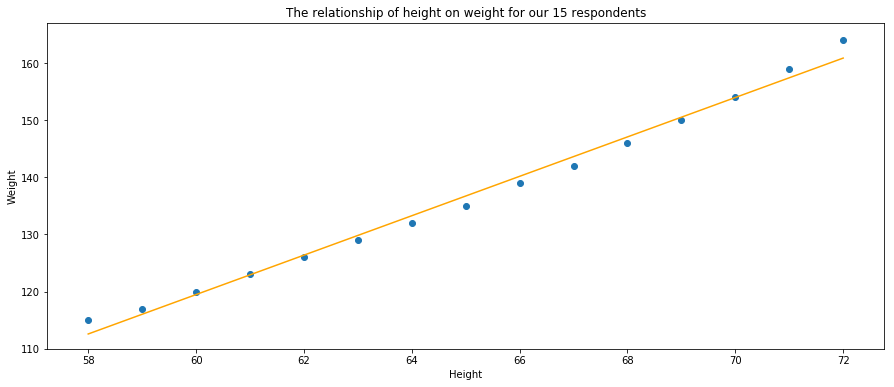

In [162]:
plt.figure(figsize=(15,6))
plt.plot(pred_data[:,0],pred_data[:,1],color="orange")
plt.scatter(data.height,data.weight)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("The relationship of height on weight for our 15 respondents")

Let's examine how well the predictions and the actual values map onto one another. Let's zoom in on the 15th participant and see where our prediction vector and observed vectors lie.

In [163]:
plot = vla()
plot.graph(300,dim=600)
participant = 14
plot.vector(pred_data[participant],add_color="blue",alpha=.4)
plot.vector(data.loc[participant,['height','weight']].values,add_color="black",alpha=.4)
plot.show()

#### Making predictions with new data points...

In [164]:
new_height = 50
new_x = np.array([1,new_height])
print(new_x)

# transform the new data threw our coef vector
new_pred_weight = new_x.dot(b) 
new_pred_weight


pred_vec = np.array([new_height,new_pred_weight])
pred_vec

[ 1 50]


array([50.  , 84.98])

#### What happens if we were way off?

In [165]:
pred_data[10]

array([ 68.  , 147.08])

In [166]:
fake_entry = np.array([68,90])
fake_entry

array([68, 90])

If we were to project the new data point on our prediction, what does this tell us?

In [167]:
plot.clear().graph(300,dim=600)
plot.subtract_vectors(pred_data[10],fake_entry)
plot.show()

In [141]:
# calculate the error of the data point
147.08 - 90

57.08000000000001

In [140]:
# The length of the distance between the two vectors is the same as the error between them. 
np.linalg.norm(pred_data[10] - fake_entry)

57.08000000000004

## Multiplying Matrices

What happens when we want to perform two transformation simultaneously?

$$ g \circ f: x \mapsto s \mapsto y $$

$$ g(\vec{x}) = \vec{s}$$

$$ f(\vec{s}) = y $$

We can represent this as the multiplication of two (or more) matrices.

$$ f(g(\vec{x})) = \textbf{A}_{2x2}\textbf{B}_{2x2}  \vec{x}$$

That is, we transform $\vec{x}$ by $\textbf{B}$ and then transform that resulting vector by $\textbf{A}$ much as we would with the nested function $f(g(\vec{x}))$. 

In [22]:
A

array([[ 1., -1.],
       [ 0.,  3.]])

In [23]:
B

array([[-3. ,  1. ],
       [ 0.5,  2.3]])

In [24]:
a

array([1, 2])

In [25]:
a_new = B.dot(a)
a_new

array([-1. ,  5.1])

In [26]:
A.dot(a_new)

array([-6.1, 15.3])

This is equivalent to...

In [27]:
A.dot(B).dot(a)

array([-6.1, 15.3])

#### Now visually

In [28]:
plot.clear().graph(25,grid=True)
plot.vector(a)
plot.show()

In [29]:
plot.clear()
plot.change_basis(B)
plot.graph(25,grid=True)
plot.vector(a)
plot.show()

In [93]:
plot.clear()
plot.change_basis(A.dot(B))
plot.graph(25,grid=True)
plot.vector(a)
plot.show()

In [95]:
# Let's do this all on in one go.
plot.clear().graph(25)
plot.vector(a)
plot.vector(A.dot(B).dot(a),add_color="purple")
plot.show()

### Multiplying two matrices by hand 

$$\textbf{A}_{mxn} = 
                     \begin{bmatrix}
                         \vec{a}_{1} & \vec{a}_{2} & \dots & \vec{a}_{n}\\
                     \end{bmatrix} = 
                    \begin{bmatrix} a_{11} & a_{12} & \dots & a_{1n}  \\ 
                                     a_{21}  & a_{22} & \dots & a_{2n} \\
                                     \vdots & \vdots & \ddots & \vdots \\
                                     a_{m1}  & a_{m2} & \dots & a_{mn} \\
                     \end{bmatrix} $$
                     
$$\textbf{B}_{nxk} = 
                    \begin{bmatrix}
                         \vec{b}_{1} & \vec{b}_{2} & \dots & \vec{b}_{k}\\
                     \end{bmatrix}  = 
                    \begin{bmatrix} b_{11} & b_{12} & \dots & b_{1k}  \\ 
                                     b_{21}  & b_{22} & \dots & b_{2k} \\
                                     \vdots & \vdots & \ddots & \vdots \\
                                     b_{n1}  & b_{n2} & \dots & b_{nk} \\
                     \end{bmatrix}$$
                     
Note that to multiply two matrices, their corresponding dimensions must align. Why? 

$$m \times \textbf{n}~~\textbf{n}\times k $$

Think of the $\textbf{A}$ as performing a linear transformation on each column vector of $\textbf{B}$

$$ \textbf{A}_{m \times \textbf{n}} \textbf{B}_{\textbf{n}\times k} = 
                     \begin{bmatrix}
                         \textbf{A} \vec{b}_{1} & \textbf{A} \vec{b}_{2} & \dots & \textbf{A} \vec{b}_{k}\\
                     \end{bmatrix}$$
                     
                     
$$
\begin{bmatrix}
 [a_{11} b_{11} + \dots + a_{1n} b_{n1} ] & [a_{11} b_{12} + \dots + a_{1n} b_{n2} ] & \dots & [a_{11} b_{1k} + \dots + a_{1n} b_{nk} ]\\
 \vdots & \vdots & \vdots & \vdots \\
 [a_{m1} b_{11} + \dots + a_{mn} b_{n1} ] & [a_{m1} b_{22} + \dots + a_{mn} b_{n2} ] & \dots & [a_{m1} b_{1k} + \dots + a_{mn} b_{nk} ]
\end{bmatrix}$$

$$ \textbf{A}_{m \times \textbf{n}} \textbf{B}_{\textbf{n}\times k} = \textbf{C}_{m\times k} $$

**Example**:

$$\textbf{A}_{2x3} = 
                    \begin{bmatrix} 1 & 3 & 1  \\ 
                                    0 & 1 & -1 \\
                     \end{bmatrix} $$

$$\textbf{B}_{3x2} = 
                    \begin{bmatrix} 2 & 1 \\ 
                                    -1 & -2 \\
                                    4 & 3 \\
                     \end{bmatrix} $$
                     
                     
$$ \textbf{A}_{2x3} \textbf{B}_{3x2} $$

$$ \begin{bmatrix}
   \textbf{A}\begin{bmatrix} 2  \\ -1 \\ 4 \\ \end{bmatrix} &
   \textbf{A}\begin{bmatrix} 1 \\ -2 \\ 3 \\ \end{bmatrix} 
   \end{bmatrix} $$
   
   
$$ \begin{bmatrix}
   \begin{bmatrix} 1  \\ 3 \\ 1 \\ \end{bmatrix} \begin{bmatrix} 2  \\ -1 \\ 4 \\ \end{bmatrix} &
   \begin{bmatrix} 1  \\ 3 \\ 1 \\ \end{bmatrix}\begin{bmatrix} 1 \\ -2 \\ 3 \\ \end{bmatrix} \\
   \begin{bmatrix} 0  \\ 1 \\ -1 \\ \end{bmatrix} \begin{bmatrix} 2  \\ -1 \\ 4 \\ \end{bmatrix} &
   \begin{bmatrix} 0  \\ 1 \\ -1 \\ \end{bmatrix}  \begin{bmatrix} 1 \\ -2 \\ 3 \\ \end{bmatrix} 
   \end{bmatrix} $$
   
$$ \begin{bmatrix}
    1(2) + 3(-1) + 1(4) & 1(1) + 3(-2) + 1(3)\\
    0(2) + 1(-1) + -1(4) & 0(1) + 1(-2) + -1(3)
   \end{bmatrix} $$
   
$$ \begin{bmatrix}
    3 & -2\\
    -5 & -5
   \end{bmatrix} $$

In [32]:
A = np.array([[1,3,1],[0,1,-1]])
B = np.array([[2,1],[-1,-2],[4,3]])
print(A)
print(B)

[[ 1  3  1]
 [ 0  1 -1]]
[[ 2  1]
 [-1 -2]
 [ 4  3]]


In [33]:
A.dot(B)

array([[ 3, -2],
       [-5, -5]])

## Properties of Matrix Multiplication 

<font color = "grey">~~**COMMUNITIVE**~~</font>

<font color = "grey">$$ \textbf{A} \textbf{B} \ne \textbf{B} \textbf{A}  $$  </font>


**ASSOCIATIVE**

$$(\textbf{A} \textbf{B}) \textbf{C} = \textbf{A} (\textbf{B} \textbf{C}) = \textbf{A} \textbf{B} \textbf{C} $$


**DISTRIBUTIVE**

$$\textbf{A}(\textbf{B} + \textbf{C}) = \textbf{A}\textbf{B} + \textbf{A}\textbf{C}$$

But remember it's not communicative, so order matters!

----
# Basics of Using Numpy

### Vectors, Matrices, and ndimensional Arrays

In [34]:
# vector as a list
v = np.array([1,2,3,4])
v

array([1, 2, 3, 4])

In [35]:
# A matrix is a nested list
M = np.array([[1,2,3,4],
             [2,3,4,1],
             [-1,1,2,1]])
print(M)
M.shape

[[ 1  2  3  4]
 [ 2  3  4  1]
 [-1  1  2  1]]


(3, 4)

In [36]:
#  An ndimensional array is a nested list
A = np.array([
              [
                [1,2,3,4],
                [2,3,4,1],
                [-1,1,2,1]
              ],
             [
                 [1,2,3,4],
                 [2,3,4,1],
                 [-1,1,2,1]]
              ])
print(A)
A.shape

[[[ 1  2  3  4]
  [ 2  3  4  1]
  [-1  1  2  1]]

 [[ 1  2  3  4]
  [ 2  3  4  1]
  [-1  1  2  1]]]


(2, 3, 4)

### Generating Arrays

In [37]:
np.arange(1, # start
          5, # stop
          .5 # by
         )

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [38]:
# evenly spaced values for between the interval for the number requested
np.linspace(1,5,10) 

array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ])

In [39]:
# Generate 10 random numbers
np.random.randn(10) 

array([-2.36136353,  0.25935499,  0.19370782,  0.13043243,  1.50064783,
        0.38198906, -0.43939266, -0.27897491, -0.60783785,  0.80932312])

In [40]:
# Also, we can generate random values from known distributions
np.random.binomial(1,.5,10) # coin flip distribution

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [41]:
np.random.normal(5,1,10) # normal (continuous) distribution

array([3.11669063, 6.03848886, 3.76576751, 3.32417661, 4.64763258,
       5.67540932, 4.04703247, 4.91516121, 4.16808634, 4.7597851 ])

In [42]:
np.random.poisson(1,10) # count distribution

array([0, 0, 1, 3, 1, 2, 0, 0, 0, 0])

In [43]:
np.random.uniform(1,5,10) # uniform distribution

array([1.58986647, 1.2823207 , 4.29460437, 4.54977674, 2.78640906,
       3.69769616, 1.22144169, 2.47988784, 4.97414065, 4.31116983])

### Reshaping Arrays

In [44]:
M.shape

(3, 4)

In [45]:
M.reshape(6,2)

array([[ 1,  2],
       [ 3,  4],
       [ 2,  3],
       [ 4,  1],
       [-1,  1],
       [ 2,  1]])

In [46]:
M.reshape(4,3)

array([[ 1,  2,  3],
       [ 4,  2,  3],
       [ 4,  1, -1],
       [ 1,  2,  1]])

In [47]:
# Can only reshape given the appropriate dimensions
# M.reshape(10,2)

In [48]:
# use negative 1 to guess the dimension
P = np.random.randn(50).reshape(5,-1)
P.shape

(5, 10)

In [49]:
# Alternative way to change the shape
P.shape = 10,5
P.shape

(10, 5)

## Generating Matrices

In [50]:
# Matrix full of zeros
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [51]:
# Matrix full of ones
np.ones((3,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [52]:
# Identity Matrix
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [53]:
# empty container
empty_array = np.empty((2,3))
empty_array

array([[4.9e-324, 1.5e-323, 4.9e-324],
       [0.0e+000, 4.9e-324,      nan]])

Generating a matrix similar to the one you already have

In [54]:
np.ones_like(P)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [55]:
np.zeros_like(P)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

### Indexing and Slicing

```
M[row,column]
```

In [56]:
X = np.linspace(1,25,25).reshape(5,5)
X

array([[ 1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10.],
       [11., 12., 13., 14., 15.],
       [16., 17., 18., 19., 20.],
       [21., 22., 23., 24., 25.]])

In [57]:
X[0] # index first row 

array([1., 2., 3., 4., 5.])

In [58]:
X[:,0] # index first column

array([ 1.,  6., 11., 16., 21.])

In [59]:
X[0,0] # index a specific cell 

1.0

In [60]:
# Can use : or ... for a complete subsection
print(X[:,1])
print(X[...,1])

[ 2.  7. 12. 17. 22.]
[ 2.  7. 12. 17. 22.]


In [61]:
# slice rows and columns
X[0:3,0:3] 

array([[ 1.,  2.,  3.],
       [ 6.,  7.,  8.],
       [11., 12., 13.]])

In [62]:
# slice rows and columns
X[:3,:3] 

array([[ 1.,  2.,  3.],
       [ 6.,  7.,  8.],
       [11., 12., 13.]])

In [63]:
X[-1,:] # last row

array([21., 22., 23., 24., 25.])

In [64]:
X[:,-1] # last column

array([ 5., 10., 15., 20., 25.])

Demand specific indices (similar to `R`'s functionality)

In [65]:
X[[3,0,2],:]

array([[16., 17., 18., 19., 20.],
       [ 1.,  2.,  3.,  4.,  5.],
       [11., 12., 13., 14., 15.]])

In [66]:
X[:,[3,0,2]]

array([[ 4.,  1.,  3.],
       [ 9.,  6.,  8.],
       [14., 11., 13.],
       [19., 16., 18.],
       [24., 21., 23.]])

### Reassignment

In [67]:
X

array([[ 1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10.],
       [11., 12., 13., 14., 15.],
       [16., 17., 18., 19., 20.],
       [21., 22., 23., 24., 25.]])

In [68]:
X[:3,:3] = 0
X

array([[ 0.,  0.,  0.,  4.,  5.],
       [ 0.,  0.,  0.,  9., 10.],
       [ 0.,  0.,  0., 14., 15.],
       [16., 17., 18., 19., 20.],
       [21., 22., 23., 24., 25.]])

In [69]:
X[1,2] = -999
X[4,4] = -999

In [70]:
X

array([[   0.,    0.,    0.,    4.,    5.],
       [   0.,    0., -999.,    9.,   10.],
       [   0.,    0.,    0.,   14.,   15.],
       [  16.,   17.,   18.,   19.,   20.],
       [  21.,   22.,   23.,   24., -999.]])

### Printing Numpy Arrays

np automatically truncates the data when printing. Handy when you have _alot_ of data

In [71]:
print(np.arange(10000).reshape(100,100))

[[   0    1    2 ...   97   98   99]
 [ 100  101  102 ...  197  198  199]
 [ 200  201  202 ...  297  298  299]
 ...
 [9700 9701 9702 ... 9797 9798 9799]
 [9800 9801 9802 ... 9897 9898 9899]
 [9900 9901 9902 ... 9997 9998 9999]]


In [72]:
# We can adjust these settings
np.set_printoptions(threshold=None)
print(np.arange(100).reshape(10,10))

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


### Handling Multiple Data Types

In [73]:
T = np.array([['a','b','c'],[1,2,3],[.3,.55,1.2]])
T

array([['a', 'b', 'c'],
       ['1', '2', '3'],
       ['0.3', '0.55', '1.2']], dtype='<U4')

In [74]:
T = np.array([[1,2,3],[.3,.55,1.2]])
T

array([[1.  , 2.  , 3.  ],
       [0.3 , 0.55, 1.2 ]])

We'll rely on Pandas Data Frames when using use multiple data types.

### Some Useful Methods

In [75]:
X = np.random.randn(25).reshape(5,5)
X = X.round(2)
X

array([[ 1.19,  0.25,  2.08, -1.36,  0.49],
       [-1.99, -0.88,  0.98, -1.21,  0.14],
       [-0.62,  1.19,  0.97, -0.65,  0.09],
       [-0.59,  1.95, -0.99, -0.98, -0.8 ],
       [ 1.  ,  0.3 , -2.21, -1.03, -1.25]])

In [76]:
# Diagonal of a matrix
np.diag(X)

array([ 1.19, -0.88,  0.97, -0.98, -1.25])

In [77]:
# Upper Triangle
np.triu(X)

array([[ 1.19,  0.25,  2.08, -1.36,  0.49],
       [ 0.  , -0.88,  0.98, -1.21,  0.14],
       [ 0.  ,  0.  ,  0.97, -0.65,  0.09],
       [ 0.  ,  0.  ,  0.  , -0.98, -0.8 ],
       [ 0.  ,  0.  ,  0.  ,  0.  , -1.25]])

In [78]:
# Lower Triangle
np.tril(X)

array([[ 1.19,  0.  ,  0.  ,  0.  ,  0.  ],
       [-1.99, -0.88,  0.  ,  0.  ,  0.  ],
       [-0.62,  1.19,  0.97,  0.  ,  0.  ],
       [-0.59,  1.95, -0.99, -0.98,  0.  ],
       [ 1.  ,  0.3 , -2.21, -1.03, -1.25]])

In [79]:
# Index Location of the maximum value
np.argmax(X)

2

In [80]:
# Index Location of the minmum value
np.argmin(X)

22

In [81]:
print(X.flatten()[np.argmax(X)])
print(X.flatten()[np.argmin(X)])

2.08
-2.21


In [82]:
# Scan where a condition holds
np.where(X > 0)

(array([0, 0, 0, 0, 1, 1, 2, 2, 2, 3, 4, 4]),
 array([0, 1, 2, 4, 2, 4, 1, 2, 4, 1, 0, 1]))

In [83]:
X[np.where(X > 0)]

array([1.19, 0.25, 2.08, 0.49, 0.98, 0.14, 1.19, 0.97, 0.09, 1.95, 1.  ,
       0.3 ])

In [84]:
X[np.where(X < 0)]

array([-1.36, -1.99, -0.88, -1.21, -0.62, -0.65, -0.59, -0.99, -0.98,
       -0.8 , -2.21, -1.03, -1.25])

In [85]:
# Count the number of non-zero entries
np.count_nonzero(np.array([1,0,8,0,1]))

3

In [86]:
# scan for missing values
X[1,2] = np.nan
X[3,3] = np.nan
X[4,1] = np.nan
np.isnan(X)

array([[False, False, False, False, False],
       [False, False,  True, False, False],
       [False, False, False, False, False],
       [False, False, False,  True, False],
       [False,  True, False, False, False]])

In [87]:
~np.isnan(X) # are not NAs

array([[ True,  True,  True,  True,  True],
       [ True,  True, False,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True, False,  True],
       [ True, False,  True,  True,  True]])

In [88]:
# Replace missing values with zero
X[np.where(np.isnan(X))] = 0
X

array([[ 1.19,  0.25,  2.08, -1.36,  0.49],
       [-1.99, -0.88,  0.  , -1.21,  0.14],
       [-0.62,  1.19,  0.97, -0.65,  0.09],
       [-0.59,  1.95, -0.99,  0.  , -0.8 ],
       [ 1.  ,  0.  , -2.21, -1.03, -1.25]])

This is only scratching the surface! Play around with the library yourself!